# Intro

At the end of this lesson, you will understand and know how to use
- **Stride lengths** to make your model faster and reduce memory consumption
- **Dropout** to combat overfitting

Both of these techniques are especially useful in large models.

# Lesson

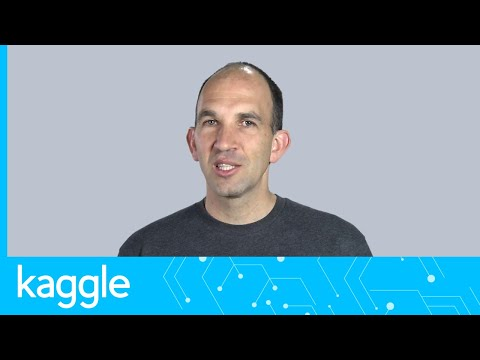

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('fwNLf4t7MR8', width=800, height=450)

# Sample Code

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_size = 30000
train_file = "../input/digit-recognizer/train.csv"
raw_data = pd.read_csv(train_file)

x, y = data_prep(raw_data)

model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 strides=2,
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(30, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Epoch 1/2
263/263 [==============================] - 18s 69ms/step - loss: 0.6254 - accuracy: 0.8097 - val_loss: 0.2138 - val_accuracy: 0.9410
Epoch 2/2
263/263 [==============================] - 19s 73ms/step - loss: 0.2538 - accuracy: 0.9229 - val_loss: 0.1206 - val_accuracy: 0.9651


# Exercise
**[Apply dropout and strides](#$EXERCISE_FORKING_URL$)** yourself while experimenting with larger models.